In [ ]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# no.of dimensions of tesnor
print(x_train.ndim)

3


In [ ]:
# dimension of tensor
print(x_train.shape)

(60000, 28, 28)


In [ ]:
# datatype of tensor
print(x_train.dtype)

uint8


In [ ]:
# Visualizing images & their labels

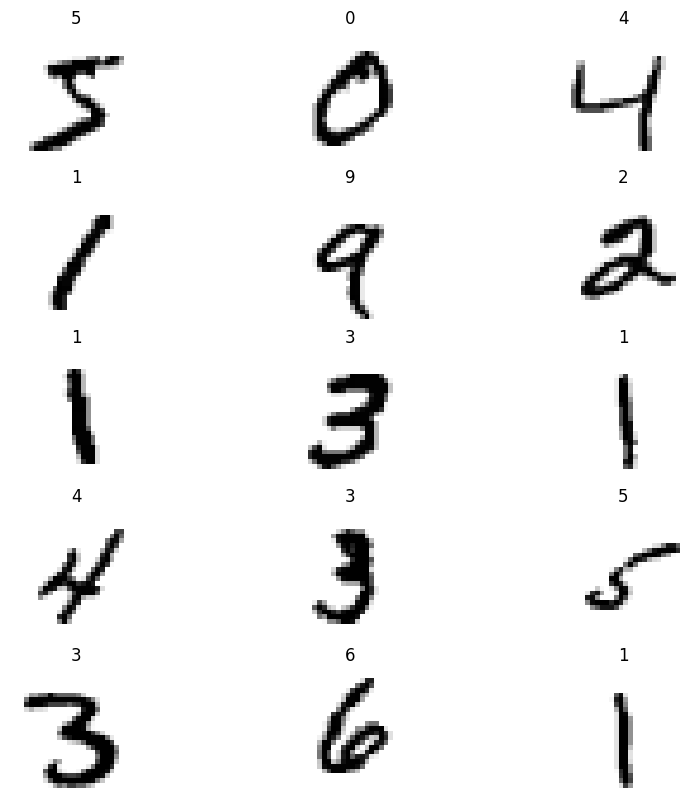

In [ ]:
plt.figure(figsize=(10,10))
for i in range(15):
  plt.subplot(5,3,i+1)
  plt.imshow(x_train[i],cmap=plt.cm.binary)
  plt.title(y_train[i])
  plt.axis('off')

In [ ]:
# Preprocessing

In [ ]:
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
# Labeeling

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_train[0]

5

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_train=to_categorical(y_train,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
y_train.shape

(60000, 10)

In [ ]:
cnn=tf.keras.models.Sequential()

In [ ]:
cnn.add(tf.keras.layers.Conv2D(16,activation='relu',kernel_size=(3,3),padding='same',input_shape=(28,28,1)))

In [ ]:
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='valid',strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(32,activation='relu',padding='same',kernel_size=(3,3)))

In [ ]:
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='valid',strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(64,activation='relu',padding='same',kernel_size=(3,3)))

In [ ]:
cnn.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),padding='valid',strides=2))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(16,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dense(10,activation='softmax'))

In [ ]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

In [ ]:
history=cnn.fit(x_train,y_train,validation_split=0.2, epochs=10)

Epoch 1/10
1500/1500 [==============================] - 26s 8ms/step - loss: 0.2693 - accuracy: 0.9181 - val_loss: 0.0871 - val_accuracy: 0.9757
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0772 - accuracy: 0.9760 - val_loss: 0.0649 - val_accuracy: 0.9820
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0525 - accuracy: 0.9838 - val_loss: 0.0507 - val_accuracy: 0.9849
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0410 - accuracy: 0.9870 - val_loss: 0.0493 - val_accuracy: 0.9858
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0328 - accuracy: 0.9896 - val_loss: 0.0483 - val_accuracy: 0.9861
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0259 - accuracy: 0.9919 - val_loss: 0.0429 - val_accuracy: 0.9884
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0214 - accuracy: 0.9929 - val_loss: 0.0397 - val_accuracy

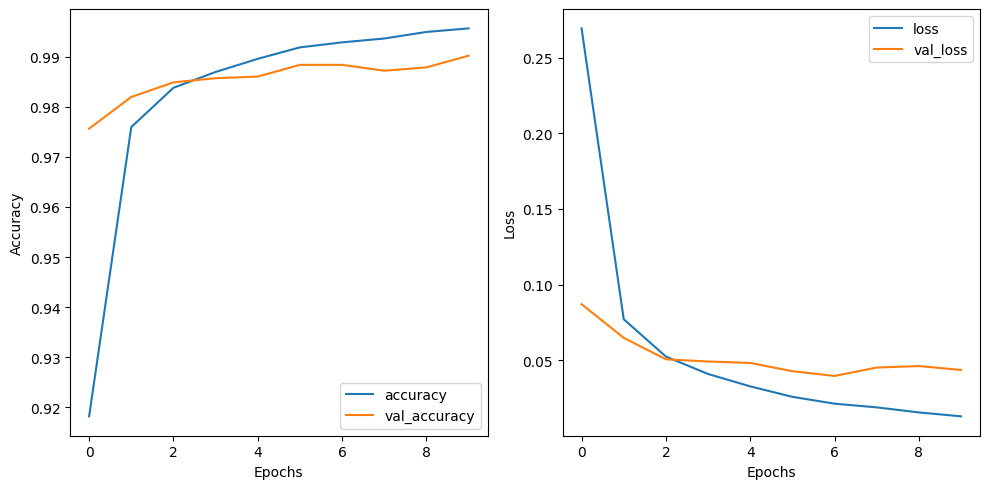

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
test_loss,test_acc=cnn.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0357 - accuracy: 0.9886


In [ ]:
print('Test accuracy:', round(test_acc,4))

Test accuracy: 0.9886


In [ ]:
y_pred=cnn.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
# Prediction for 1st image is 7
np.argmax(y_pred[0])

7

In [ ]:
# Verifying result
y_test[0]  # in result 7th position have 1 means output is 7 i.e. it gives accurate results.

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
# Plot confusion matrix
# Note: This code snippet for confusion-matrix is taken directly from the SKLEARN website.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual class')
    plt.xlabel('Predicted class')

In [ ]:
# Plotting Confusion Matrix

313/313 [==============================] - 1s 3ms/step


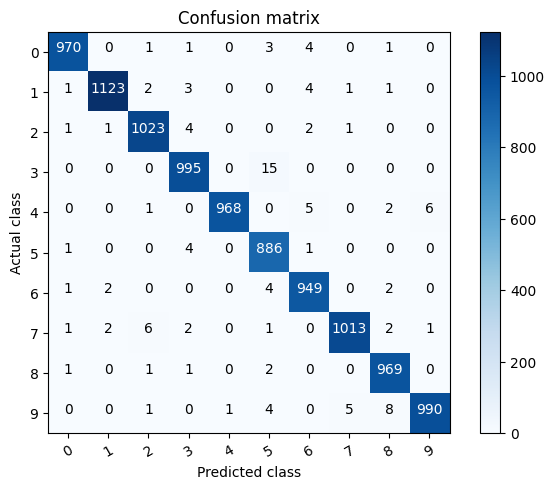

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = cnn.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))